# Notebook 14 - Partial Differential Equations

Partial differential equations describe some of the most important phenomena in nature (waves, heat transfer, electrostatics, fluid dynamics, gravitation, quantum mechanics, diffusion). They are also very hard to solve! Luckily we have numerical methods which can be used to approximate the solution.

#### Examples:

Laplace's equation for the electric potential:

$\frac{\partial^2 \phi}{\partial x^2}+\frac{\partial^2 \phi}{\partial y^2}+\frac{\partial^2 \phi}{\partial z^2} = 0$

Poisson's equation for the electric potential:

$\frac{\partial^2 \phi}{\partial x^2}+\frac{\partial^2 \phi}{\partial y^2}+\frac{\partial^2 \phi}{\partial z^2} = -\frac{\rho}{\epsilon}$

Poisson's equation for gravity:

$\frac{\partial^2 \phi}{\partial x^2}+\frac{\partial^2 \phi}{\partial y^2}+\frac{\partial^2 \phi}{\partial z^2} = 4\pi G\rho$

Wave equation (1D):

$\frac{\partial^2 \psi}{\partial t^2}=c^2 \frac{\partial^2 \psi}{\partial x^2}$

Heat equation (alpha is the "diffusivity"):

$\frac{\partial T}{\partial t}=\alpha \Big(\frac{\partial^2 T}{\partial x^2}+\frac{\partial^2 T}{\partial y^2}+\frac{\partial^2 T}{\partial z^2}\Big)$


Schrodinger equation:

$i\hbar\frac{\partial}{\partial t}\Psi(\vec{r},t)=\Big[\frac{-\hbar^2}{2m}\Big(\frac{\partial^2 }{\partial x^2}+\frac{\partial^2 }{\partial y^2}+\frac{\partial^2 }{\partial z^2}\Big)+V(\vec{r},t)\Big]\Psi(\vec{r},t)$




# Boundary value problems

### Solving Laplace's Equation

Example from book: An empty box has conducting walls. The top wall is at a voltage V, and all of the other walls have a voltage of 0 (they are grounded). What is the value of the electric potential at some location within the box?

Goal: Solve Laplace's equation

$\frac{\partial^2 \phi}{\partial x^2}+\frac{\partial^2 \phi}{\partial y^2}+\frac{\partial^2 \phi}{\partial z^2} = 0$

with the given boundary conditions.

We can solve such "boundary value problems" by using the method of finite differences in combination with the relaxation method. We will split the box up into a grid and solve Laplace's equation at each grid point.

Chalk board: Show that on a grid with spacing $a$, solving  Laplace's equation becomes solving the following equation for each grid point:

$\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a)-4\phi(x,y)=0$

or rearranging:

$\phi(x,y)=\frac{1}{4}[\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a)]$

We have a linear set of simultaneous equations for each grid point and we can use the relaxation method to solve. 

Solving PDEs with the method of finite differences in combination with the relaxation method is known as the "Jacobi method". The relaxation method fails for some systems of equations but it always works for PDEs. The only problem is that the Jacobi method is slow. Solving for a 100x100 grid requires solving 10,000 simultaneous equations.

#### Boundary conditions: Square box with top edge at voltage = 1 V and all other edges at 0 V

In [171]:
from numpy import empty,zeros,max

# Constants
M = 10         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-4   #1e-6   # Target accuracy

# Create arrays to hold potential values
phi = zeros([M+1,M+1],float)
phi[0,:] = V # Set boundary conditions
phiprime = empty([M+1,M+1],float)
#tempx = zeros([M+1,M+1],float)

print("Phi before loop:")
print(phi)

# Main loop - Relaxation Method for PDE
delta = 1.0
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            
            # On the boundaries the voltage must = boundary conditions
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            # In the middle grid estimate voltage based on neighboring voltages
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4

    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi
    
print("Phi after loop:")
print(phi)


Phi before loop:
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Phi after loop:
[[ 1.          1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.        ]
 [ 0.          0.48873843  0.67443599  0.75387201  0.78836821  0.79821635
   0.78836821  0.75387201  0.67443599  0.48873843  0.        ]
 [ 0.          0.28055518  0.45520126  0.55278187  0.60149408  0.61625015
   0.60149408  0.55278187  0.45520126  0.28055518  0.        ]
 [ 0.          0.17834877  0.31316742  0.40073

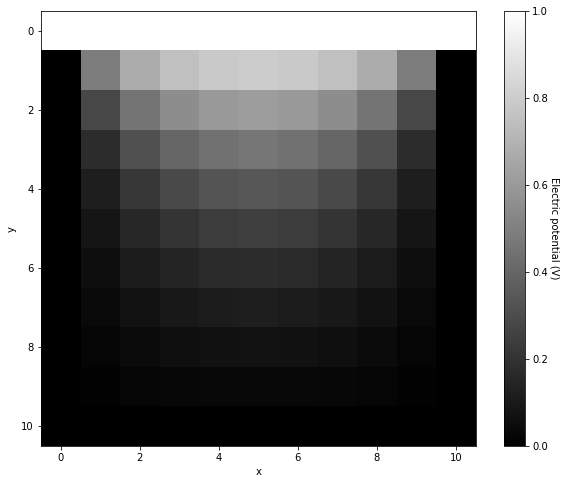

In [172]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 8
plt.imshow(phi,origin='upper')
plt.gray()
plt.colorbar().set_label('Electric potential (V)', rotation=270, labelpad=11)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

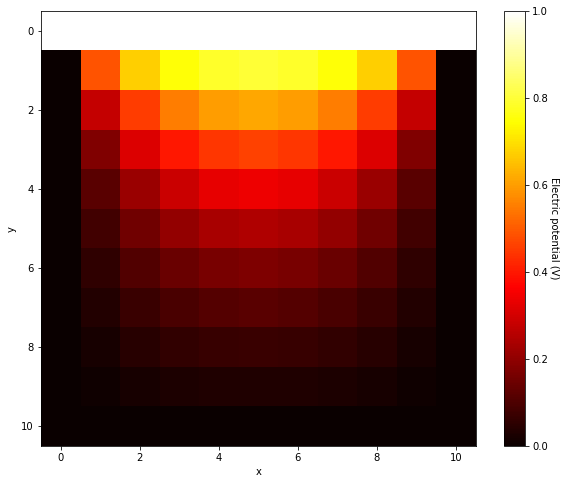

In [173]:
plt.imshow(phi, cmap="hot", origin='upper')
plt.colorbar().set_label('Electric potential (V)', rotation=270, labelpad=11)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

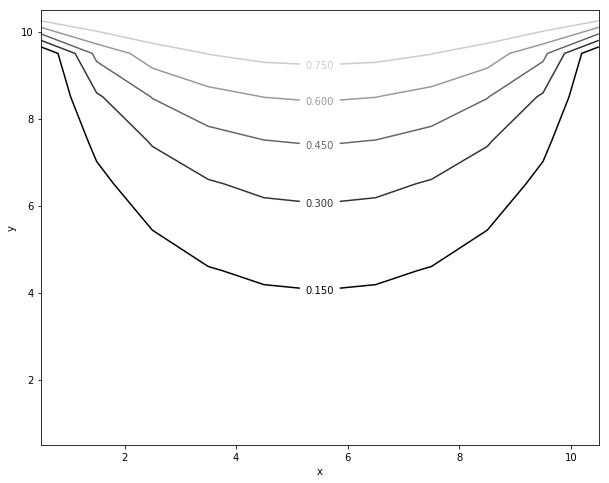

In [174]:
# Draw equipotentials with a contour plot:
#plt.contour(phi, origin='upper')
CS = plt.contour(phi, origin='image')
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

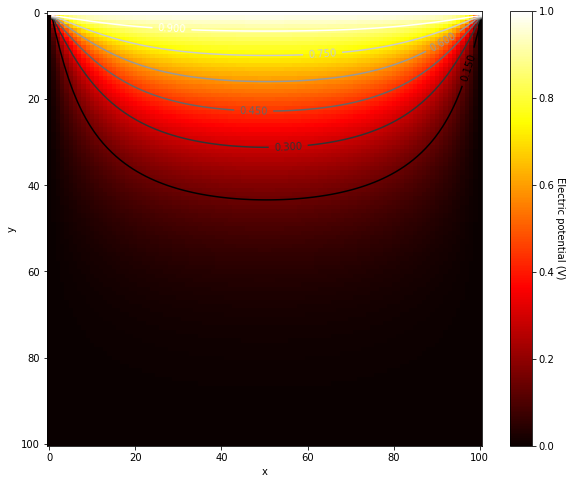

In [78]:
plt.imshow(phi, cmap="hot", origin='upper')
plt.colorbar().set_label('Electric potential (V)', rotation=270, labelpad=11)
CS = plt.contour(phi, origin='lower')
plt.clabel(CS, inline=1, fontsize=10, origin='upper')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Boundary conditions: Square box with top edge at voltage = 1 V, bottom edge at voltage = -1 V, right edge at 2V, and all other edges at 0 V

In [27]:
from numpy import empty,zeros,max

plt.rcParams['figure.figsize'] = 10, 8

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-4#1e-6   # Target accuracy

# Create arrays to hold potential values
phi2 = zeros([M+1,M+1],float)
phi2[0,:] = V
phi2[:,0] = 2*V
phi2[M,:] = -V
phiprime = empty([M+1,M+1],float)

# Main loop
delta = 1.0
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi2[i,j]
            else:
                phiprime[i,j] = (phi2[i+1,j] + phi2[i-1,j] \
                                 + phi2[i,j+1] + phi2[i,j-1])/4

    # Calculate maximum difference from old values
    delta = max(abs(phi2-phiprime))

    # Swap the two arrays around
    phi2,phiprime = phiprime,phi2


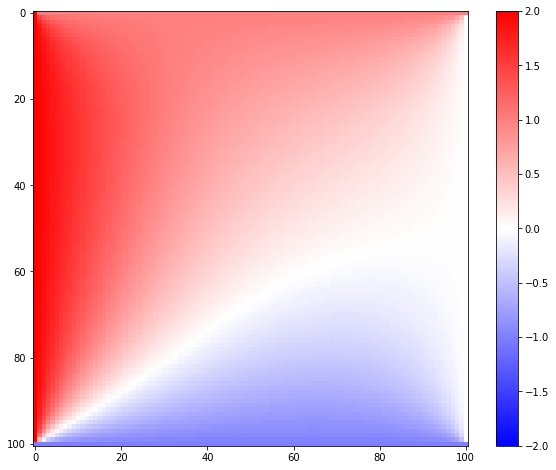

In [28]:
import pylab as plt

plt.imshow(phi2, cmap="bwr", origin="upper")
plt.clim(-2,2)
plt.colorbar()
plt.show()

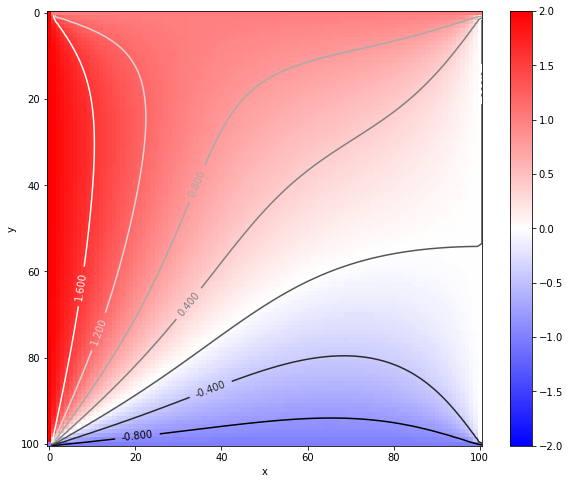

In [80]:
plt.imshow(phi2, cmap="bwr", origin="upper")
plt.clim(-2,2)
plt.colorbar()
CS = plt.contour(phi2, origin='lower')
plt.clabel(CS, inline=1, fontsize=10, origin='upper')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Boundary conditions: Square box with top and bottom edge at voltage = - 1 V, and side edges at voltage = 2V

In [31]:

from numpy import empty,zeros,max

plt.rcParams['figure.figsize'] = 10, 8

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-4#1e-6   # Target accuracy

# Create arrays to hold potential values
phi3 = zeros([M+1,M+1],float)
phi3[0,:] = -V
phi3[:,0] = 2*V
phi3[M,:] = -V
phi3[:,M] = 2*V
phiprime = empty([M+1,M+1],float)

# Main loop
delta = 1.0
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi3[i,j]
            else:
                phiprime[i,j] = (phi3[i+1,j] + phi3[i-1,j] \
                                 + phi3[i,j+1] + phi3[i,j-1])/4

    # Calculate maximum difference from old values
    delta = max(abs(phi3-phiprime))

    # Swap the two arrays around
    phi3,phiprime = phiprime,phi3

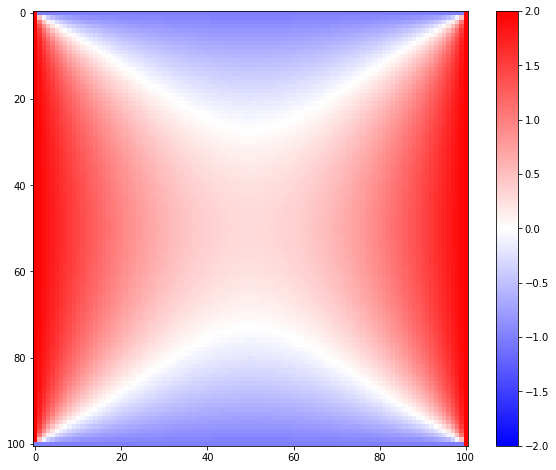

In [82]:
import pylab as plt

plt.imshow(phi3, cmap="bwr", origin="upper")
plt.clim(-2,2)
plt.colorbar()
plt.show()


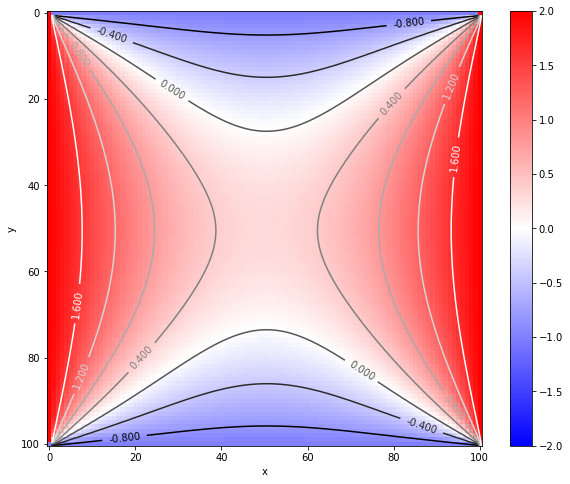

In [96]:

plt.imshow(phi3, cmap="bwr", origin="upper")
plt.clim(-2,2)
plt.colorbar()

CS = plt.contour(phi3, origin='lower')
plt.clabel(CS, inline=1, fontsize=10, origin='upper')
plt.xlabel("x")
plt.ylabel("y")
plt.show()



Let's try adding a grounded plate within the box:

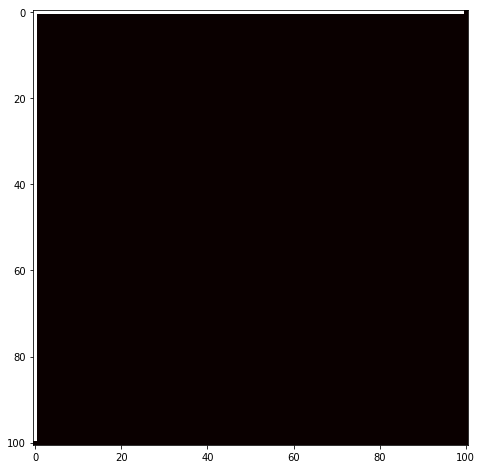

In [97]:
from numpy import empty,zeros,max

plt.rcParams['figure.figsize'] = 10, 8

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-4#1e-6   # Target accuracy

# Create arrays to hold potential values
phi4 = zeros([M+1,M+1],float)
phi4[0,:] = V
phi4[:,0] = V
phi4[M,:] = 0
phi4[:,M] = 0

phi4[10,30:70] = 0

plt.imshow(phi4, cmap="hot", origin='upper')
plt.show()


In [37]:
from numpy import empty,zeros,max

plt.rcParams['figure.figsize'] = 10, 8

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-4#1e-6   # Target accuracy

# Create arrays to hold potential values
phi4 = zeros([M+1,M+1],float)
phi4[0,:] = V
phi4[:,0] = V
phi4[M,:] = 0
phi4[:,M] = 0

phi4[10,30:70] = 0

plt.imshow(phi4, cmap="hot")

phiprime = empty([M+1,M+1],float)

# Main loop
delta = 1.0
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M or (i==10 and (j<70 or j>30)):
                phiprime[i,j] = phi4[i,j]
            else:
                phiprime[i,j] = (phi4[i+1,j] + phi4[i-1,j] \
                                 + phi4[i,j+1] + phi4[i,j-1])/4

    # Calculate maximum difference from old values
    delta = max(abs(phi4-phiprime))

    # Swap the two arrays around
    phi4,phiprime = phiprime,phi4

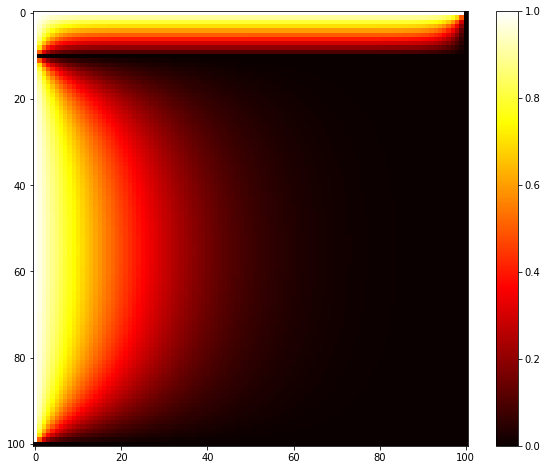

In [38]:
import pylab as plt

plt.imshow(phi4, cmap="hot")
#plt.clim(-2,2)
plt.colorbar()
plt.show()

# Poisson's Equation

Poisson's equation for the electric potential:

$\frac{\partial^2 \phi}{\partial x^2}+\frac{\partial^2 \phi}{\partial y^2}+\frac{\partial^2 \phi}{\partial z^2} = -\frac{\rho}{\epsilon}$

With the method of finite differences this becomes:

$\phi(x,y)=\frac{1}{4}[\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a)]+\frac{a^2}{4\epsilon_0}\rho(x,y)$

Use this to find the potential at every point inside a box with two square charges inside:

In [109]:
# Exercise 9.1

import numpy as np
import time
start = time.time()

# constants
L = 1.0 # length of box
M = 100 # grid squares
a = L/M # size of a grid square

rho0 = 1.0 # Charge density
epsilon = 1.0 # Electrical permitivity

target = 1e-5   # Target accuracy

# Create arrays to hold potential values
phi_91      = np.zeros([M+1,M+1],float)
phiprime_91 = np.zeros([M+1,M+1],float)
rho_91      = np.zeros([M+1,M+1],float)
rho_91[20:41,60:81] = rho0
rho_91[60:81,20:41] = -rho0

# Main loop
delta = 1.0
count = 0
#while count<3:
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M :
                phiprime_91[i,j] = phi_91[i,j]
            else:
                phiprime_91[i,j] = (phi_91[i+1,j] + phi_91[i-1,j] \
                                 + phi_91[i,j+1] + phi_91[i,j-1])/4 \
                                + rho_91[i,j]*a*a/(4*epsilon)
  
    # Calculate maximum difference from old values
    delta = np.max(abs(phi_91-phiprime_91))
 
    # Swap the two arrays around
    phi_91,phiprime_91 = phiprime_91,phi_91
    
    count +=1
    
end = time.time()
print("Time Elapsed: ",end - start)

Time Elapsed:  8.241842031478882


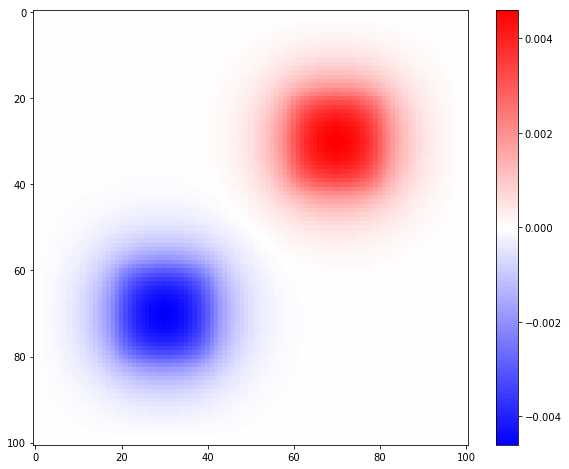

In [110]:
import pylab as plt
py.rcParams['figure.figsize'] = 10, 8
plt.imshow(phi_91, cmap="bwr")
#plt.clim(-2,2)
plt.colorbar()
plt.show()

Let's try solving it without looping over each array element (use numpy slicing instead:)

In [86]:
phi_92      = np.zeros([M+1,M+1],float)
phiprime_92 = np.zeros([M+1,M+1],float)
rho_92      = np.zeros([M+1,M+1],float)
rho_92[20:41,60:81] = rho0
rho_92[60:81,20:41] = -rho0


# constants
L = 1.0 # length of box
M = 100 # grid squares
a = L/M # size of a grid square

rho0 = 1.0 # Charge density
epsilon = 1.0 # Electrical permitivity

target = 1e-5   # Target accuracy

delta = 1.0
count = 0

while delta>target:

    # Fix boundaries at 0V
    phiprime_92[0,:] = 0.0
    phiprime_92[M,:] = 0.0
    phiprime_92[:,0] = 0.0
    phiprime_92[:,M] = 0.0
    
    # Interior values
    phiprime_92[1:M,1:M] = (phi_92[0:M-1,1:M] + phi_92[2:M+1,1:M] \
                       + phi_92[1:M,0:M-1] + phi_92[1:M,2:M+1])/4 \
                       + rho_92[1:M,1:M]*a*a/(4*epsilon)
        
    # Calculate maximum difference from old values
    delta = np.max(abs(phi_92-phiprime_92))

    # Swap the two arrays around
    phi_92,phiprime_92 = phiprime_92,phi_92

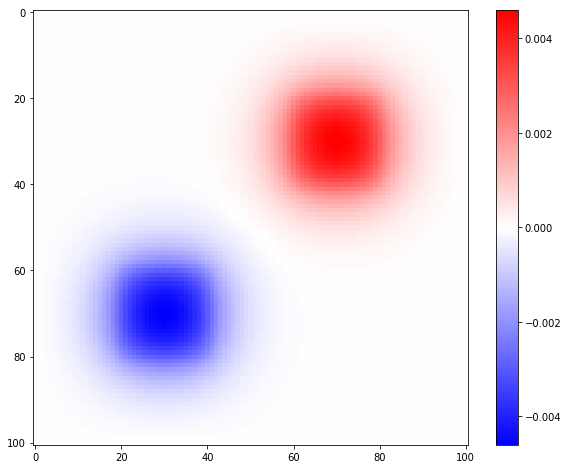

In [88]:
import pylab as plt
plt.rcParams['figure.figsize'] = 10, 8
plt.imshow(phi_92, cmap="bwr")
#plt.clim(-2,2)
plt.colorbar()
plt.show()

In [98]:
N=6
test = np.zeros([N+1,N+1],float)
test[2:5,2:5] = rho0
print(test)

[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  0.  0.]
 [ 0.  0.  1.  1.  1.  0.  0.]
 [ 0.  0.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]


In [91]:
print(test[1:N,1:N] )

[[ 0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.]]


In [92]:
print(test[0:N-1,1:N] )

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  0.]]


In [93]:
print(test[2:N+1,1:N])

[[ 0.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [94]:
print(test[1:N,0:N-1])

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.]
 [ 0.  0.  1.  1.  1.]
 [ 0.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.]]


In [95]:
print(test[1:N,2:N+1])

[[ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.]
 [ 1.  1.  1.  0.  0.]
 [ 1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [111]:
# Exercise 9.1 (now use numpy slice)

import numpy as np
import time
start = time.time()

# constants
L = 1.0 # length of box
M = 100 # grid squares
a = L/M # size of a grid square

rho0 = 1.0 # Charge density
epsilon = 1.0 # Electrical permitivity

target = 1e-5   # Target accuracy

# Create arrays to hold potential values
phi      = np.zeros([M+1,M+1],float)
phiprime = np.zeros([M+1,M+1],float)
rho      = np.zeros([M+1,M+1],float)
rho[20:41,60:81] = rho0
rho[60:81,20:41] = -rho0

# Main loop
delta = 1.0

while delta>target:

    # Fix boundaries at 0V
    phiprime[0,:] = 0.0
    phiprime[M,:] = 0.0
    phiprime[:,0] = 0.0
    phiprime[:,M] = 0.0
    
    # Interior values
    phiprime[1:M,1:M] = (phi[0:M-1,1:M] + phi[2:M+1,1:M] \
                       + phi[1:M,0:M-1] + phi[1:M,2:M+1])/4 \
                       + rho[1:M,1:M]*a*a/(4*epsilon)
        
    # Calculate maximum difference from old values
    delta = np.max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi
   
end = time.time()
print("Time Elapsed: ",end - start)

Time Elapsed:  0.034040212631225586


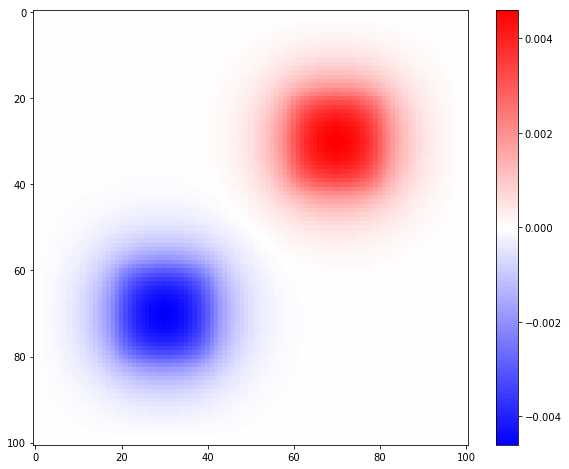

In [112]:
import pylab as plt
py.rcParams['figure.figsize'] = 10, 8
plt.imshow(phi, cmap="bwr")
#plt.clim(-2,2)
plt.colorbar()
plt.show()

Let's try it again with different charges:

In [29]:
import numpy as np

# constants
L = 1.0 # length of box
M = 100 # grid squares
a = L/M # size of a grid square

rho0 = 1.0 # Charge density
epsilon = 1.0 # Electrical permitivity
target = 1e-5   # Target accuracy

# Create arrays to hold potential values
phi      = np.zeros([M+1,M+1],float)
phiprime = np.zeros([M+1,M+1],float)
rho      = np.zeros([M+1,M+1],float)
rho[20:41,20:41] = -rho0
rho[20:41,60:81] = -rho0
rho[45:55,45:55] = 2*rho0
rho[60:81,20:81] = -rho0

# Main loop
delta = 1.0

while delta>target:

    # Fix boundaries at 0V
    phiprime[0,:] = 0.0
    phiprime[M,:] = 0.0
    phiprime[:,0] = 0.0
    phiprime[:,M] = 0.0
    
    # Interior values
    phiprime[1:M,1:M] = (phi[0:M-1,1:M] + phi[2:M+1,1:M] \
                       + phi[1:M,0:M-1] + phi[1:M,2:M+1])/4 \
                       + rho[1:M,1:M]*a*a/(4*epsilon)
        
    # Calculate maximum difference from old values
    delta = np.max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi

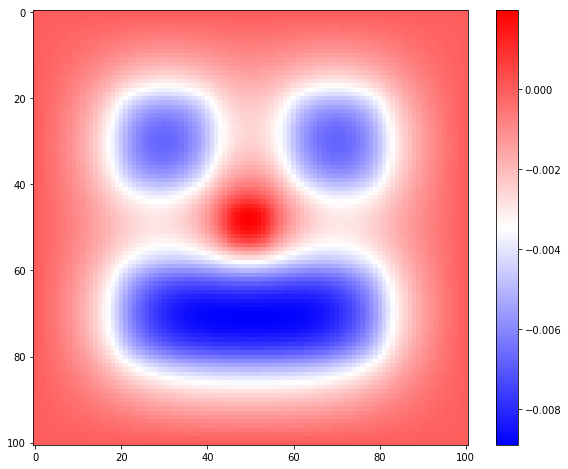

In [30]:
import pylab as plt
plt.rcParams['figure.figsize'] = 10, 8
plt.imshow(phi, cmap="bwr")
#plt.clim(-0.001,0.001)
plt.colorbar()
plt.show()

# Initial value problems

## Heat transfer

The heat equation (or diffusion equation) in one dimension includes both time and space:

$\frac{\partial T}{\partial t}=D\frac{\partial^2 T}{\partial x^2}$

Since time is now involved this becomes a "initial value problem". We still have boundary conditions in the spatial dimension, but we only know the initial value in the time dimension. 

## FTCS scheme (Forward-Time Central-Space)

Let's again divide the spatial dimension into a grid of points with spacing $a$ (since we are in 1D this is just a line with evenly spaced points). We can then write the derivative using the method of finite differences:

$\frac{\partial^2 T}{\partial x^2}=\frac{T(x+a,t)+T(x-a,t)-2T(x,t)}{a^2}$

so our equation becomes:

$\frac{d T}{d t}=\frac{D}{a^2}[T(x+a,t)+T(x-a,t)-2T(x,t)]$

We now have a set of simultaneous ordinary differential equations like the ones we discussed earlier. Once again we can use Euler's method to solve this:

$\frac{d T}{d t}=f(T,t)$

$T(t+\Delta t)=T(t)+\Delta t\frac{d T}{dt} =T(t)+\Delta t f(T,t) $

So therefore our differential equation becomes:

$T(x,t+\Delta t)=T(x,t)+\Delta t\frac{D}{a^2}[T(x+a,t)+T(x-a,t)-2T(x,t)]$

If we know the value of T at every grid point at some time $t$, then this equation tells the value of T at each grid point at time $t+\Delta t$ .

#### Example: Stainless steel container

Imagine a 1cm thick stainless steel container which is initially at T = 20 C. If we fill the container with hot water (50 C) and emerse it a bath of cold water (0 C), find the temperature profile of the steel as a function of time and as a function of the distance x from the hot side to the cold side. The thermal diffusivity of stainless steel is $D = 4.25 \times 10^{-5}$ m$^2$ s$^{-1}$.


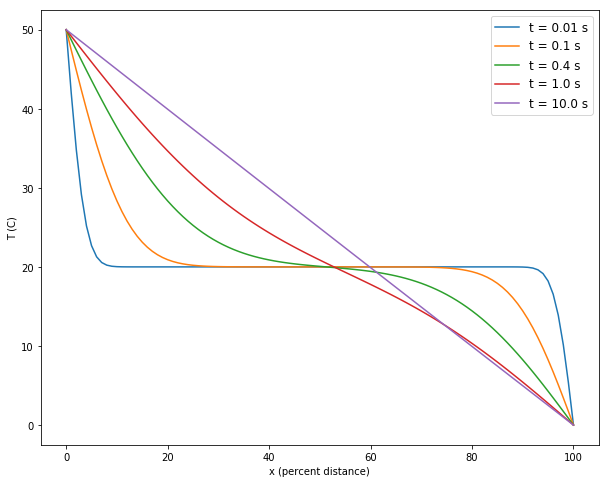

In [41]:
from numpy import empty

# Constants
L = 0.01      # Thickness of steel in meters
D = 4.25e-6   # Thermal diffusivity
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-4      # Time-step
epsilon = h/1000

Tlo = 0.0     # Low temperature in Celcius
Tmid = 20.0   # Intermediate temperature in Celcius
Thi = 50.0    # Hi temperature in Celcius

t1 = 0.01
t2 = 0.1
t3 = 0.4
t4 = 1.0
t5 = 10.0
tend = t5 + epsilon

# Create arrays
T = empty(N+1,float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid
Tp = empty(N+1,float)
Tp[0] = Thi
Tp[N] = Tlo

# Main loop
t = 0.0
c = h*D/(a*a)
while t<tend:

    # Calculate the new values of T
    for i in range(1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    T,Tp = Tp,T
    t += h

    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plt.plot(T,label="t = 0.01 s")
    if abs(t-t2)<epsilon:
        plt.plot(T,label="t = 0.1 s")
    if abs(t-t3)<epsilon:
        plt.plot(T,label="t = 0.4 s")
    if abs(t-t4)<epsilon:
        plt.plot(T,label="t = 1.0 s")
    if abs(t-t5)<epsilon:
        plt.plot(T,label="t = 10.0 s")

plt.legend(loc='upper right', fontsize='large')
plt.xlabel("x (percent distance)")
plt.ylabel("T (C)")
plt.show()


## Wave Equation

Can we apply the FTCS scheme to the wave equation?

$\frac{\partial^2 \psi}{\partial t^2}=v^2 \frac{\partial^2 \psi}{\partial x^2}$

FTCS is numerically unstable for the wave equation.

In [42]:
# Waves on a string
#   solving the wave equation
#   using the FTCS scheme (Forward-Time Central-Space)
from numpy import zeros, empty, linspace, exp

# constants
L = 1.0  # string length
d = 0.1  # location of hammer strike
v = 100.0 # speed
C = 1.0 # m/s
N = 100 
a = L/N
sigma = 0.3

w = 1e-6 
steps = 100001 # number of time steps

# FTCS scheme
def f(y):
    res = empty(N+1, float)
    res[1:N] = (y[0:N-1]+y[2:N+1]-2*y[1:N])*(v*v)/(a*a)
    res[0] = res[N] = 0.0
    return res

# initial arrays
x = linspace(0.0,L,N+1) # position on on string
psi = zeros(N+1,float)  # profile
dpsi = C*x*(L-x)*exp(-(x-d)**2/(2*sigma*sigma))/(L*L)

# save psi at speciic times
psi0 = psi
psi1a = psi
psi1b = psi
psi1c = psi
psi1d = psi
psi1e = psi
psi1f = psi
psi1g = psi
psi2 = psi
psi3 = psi
psi3a = psi
psi3b = psi
psi3c = psi
psi3d = psi
psi3e = psi
psi3f = psi
psi3g = psi
psi3h = psi
psi3i = psi
psi4 = psi
psi4a = psi
psi4b = psi
psi4c = psi
psi4d = psi
psi4e = psi
psi4f = psi
psi4g = psi
psi4h = psi
psi4i = psi
psi4j = psi
psi4k = psi
psi4l = psi
psi4m = psi
psi4n = psi
psi4o = psi
psi4p = psi
psi4q = psi
psi4r = psi
psi5 = psi
psi6 = psi

for n in range(steps):
    
    psi,dpsi = psi+w*dpsi, dpsi+w*f(psi)
    
    if n==0.1:
        psi1a = psi
    if n==1:
        psi1b = psi
    if n==10:
        psi1c = psi
    if n==50:
        psi1d = psi
    if n==70:
        psi1e = psi
    if n==80:
        psi1f = psi
    if n==90:
        psi1g = psi                 
    if n==100:
        psi2 = psi
    if n==1000:
        psi3 = psi
    if n==2000:
        psi3a = psi
    if n==3000:
        psi3b = psi
    if n==4000:
        psi3c = psi
    if n==5000:
        psi3d = psi
    if n==6000:
        psi3e = psi
    if n==7000:
        psi3f = psi
    if n==8000:
        psi3g = psi
    if n==9000:
        psi3h = psi
    if n==9500:
        psi3i = psi
    if n==10000:
        psi4 = psi
    if n==11000:
        psi4a = psi
    if n==12000:
        psi4b = psi
    if n==13000:
        psi4c = psi
    if n==15000:
        psi4d = psi
    if n==17000:
        psi4e = psi
    if n==18000:
        psi4f = psi
    if n==19000:
        psi4g = psi
    if n==20000:
        psi4h = psi
    if n==30000:
        psi4i = psi
    if n==40000:
        psi4j = psi
    if n==50000:
        psi4k = psi
    if n==60000:
        psi4l = psi
    if n==70000:
        psi4m = psi
    if n==80000:
        psi4n = psi
    if n==90000:
        psi4o = psi
    if n==92000:
        psi4p = psi
    if n==95000:
        psi4q = psi
    if n==98000:
        psi4r = psi
    if n==100000:
        psi5 = psi
    if n==1000000:
        psi6 = psi  

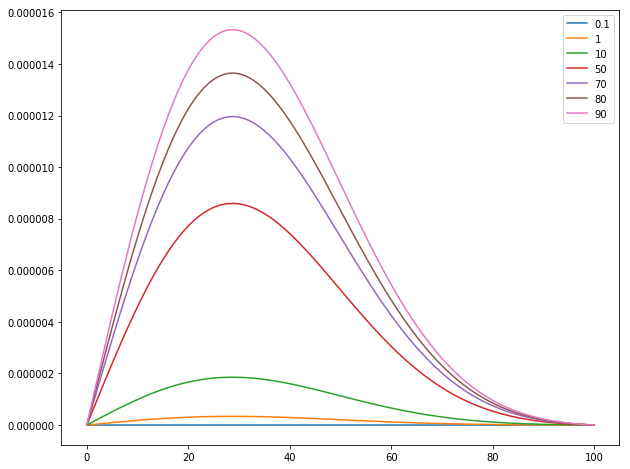

In [46]:

plt.plot(psi1a, label='0.1')
plt.plot(psi1b, label='1')
plt.plot(psi1c, label='10')
plt.plot(psi1d, label='50')
plt.plot(psi1e, label='70')
plt.plot(psi1f, label='80')
plt.plot(psi1g, label='90')
plt.legend()
plt.show()

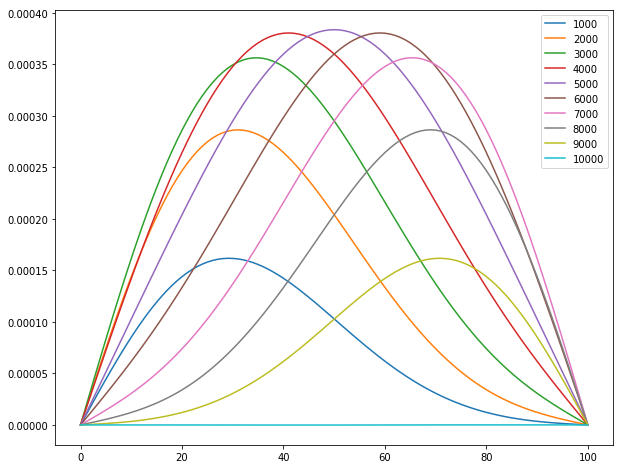

In [44]:
plt.plot(psi3 , label='1000')
plt.plot(psi3a, label='2000')
plt.plot(psi3b, label='3000')
plt.plot(psi3c, label='4000')
plt.plot(psi3d, label='5000')
plt.plot(psi3e, label='6000')
plt.plot(psi3f, label='7000')
plt.plot(psi3g, label='8000')
plt.plot(psi3h, label='9000')
plt.plot(psi4, label='10000')
plt.legend()
plt.show()

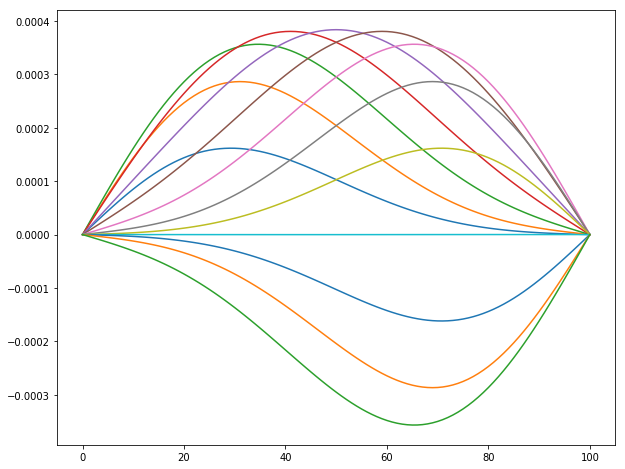

In [47]:
plt.plot(psi3, label='1000')
plt.plot(psi3a, label='2000')
plt.plot(psi3b, label='3000')
plt.plot(psi3c, label='4000')
plt.plot(psi3d, label='5000')
plt.plot(psi3e, label='6000')
plt.plot(psi3f, label='7000')
plt.plot(psi3g, label='8000')
plt.plot(psi3h, label='9000')
plt.plot(psi4, label='10000')
plt.plot(psi4a, label='11000')
plt.plot(psi4b, label='12000')
plt.plot(psi4c, label='13000')
#plt.legend()
plt.show()

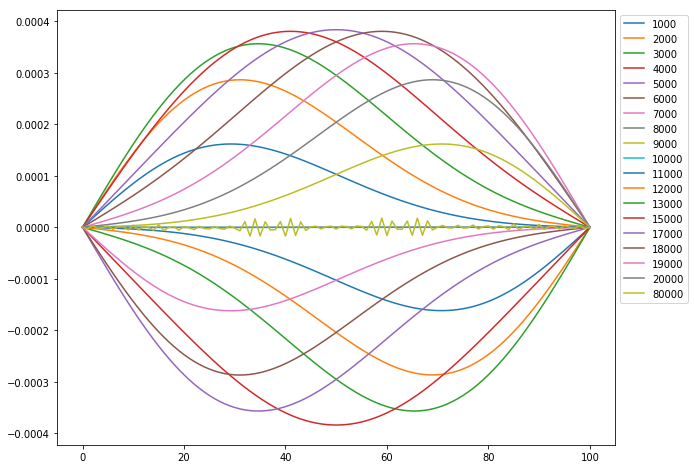

In [48]:
plt.plot(psi3, label='1000')
plt.plot(psi3a, label='2000')
plt.plot(psi3b, label='3000')
plt.plot(psi3c, label='4000')
plt.plot(psi3d, label='5000')
plt.plot(psi3e, label='6000')
plt.plot(psi3f, label='7000')
plt.plot(psi3g, label='8000')
plt.plot(psi3h, label='9000')
plt.plot(psi4, label='10000')
plt.plot(psi4a, label='11000')
plt.plot(psi4b, label='12000')
plt.plot(psi4c, label='13000')
plt.plot(psi4d, label='15000')
plt.plot(psi4e, label='17000')
plt.plot(psi4f, label='18000')
plt.plot(psi4g, label='19000')
plt.plot(psi4h, label='20000')
#plt.plot(psi4i, label='30000')
#plt.plot(psi4j, label='40000')
#plt.plot(psi4k, label='50000')
#plt.plot(psi4l, label='60000')
#plt.plot(psi4m, label='70000')
plt.plot(psi4n, label='80000')
#plt.plot(psi5 , label='100000')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

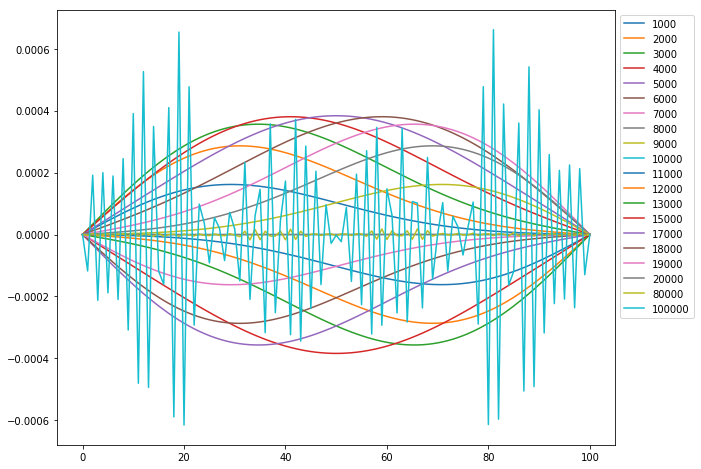

In [49]:
plt.plot(psi3, label='1000')
plt.plot(psi3a, label='2000')
plt.plot(psi3b, label='3000')
plt.plot(psi3c, label='4000')
plt.plot(psi3d, label='5000')
plt.plot(psi3e, label='6000')
plt.plot(psi3f, label='7000')
plt.plot(psi3g, label='8000')
plt.plot(psi3h, label='9000')
plt.plot(psi4, label='10000')
plt.plot(psi4a, label='11000')
plt.plot(psi4b, label='12000')
plt.plot(psi4c, label='13000')
plt.plot(psi4d, label='15000')
plt.plot(psi4e, label='17000')
plt.plot(psi4f, label='18000')
plt.plot(psi4g, label='19000')
plt.plot(psi4h, label='20000')
#plt.plot(psi4i, label='30000')
#plt.plot(psi4j, label='40000')
#plt.plot(psi4k, label='50000')
#plt.plot(psi4l, label='60000')
#plt.plot(psi4m, label='70000')
plt.plot(psi4n, label='80000')
plt.plot(psi5 , label='100000')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

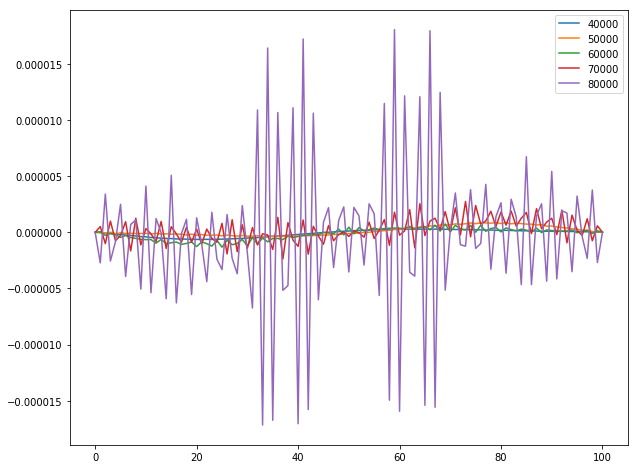

In [50]:
plt.plot(psi4j, label='40000')
plt.plot(psi4k, label='50000')
plt.plot(psi4l, label='60000')
plt.plot(psi4m, label='70000')
plt.plot(psi4n, label='80000')
plt.legend()
plt.show()

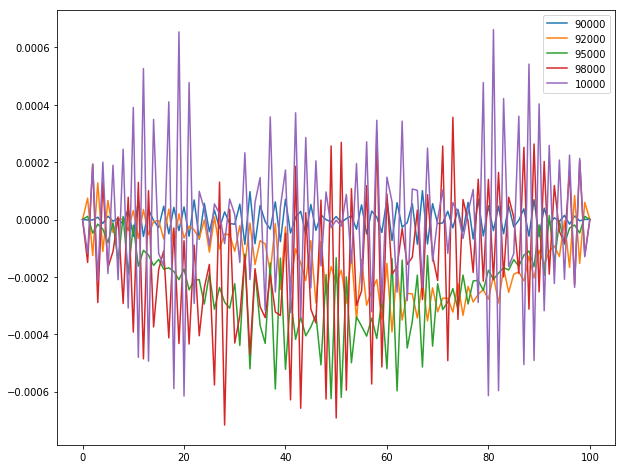

In [51]:
plt.plot(psi4o, label='90000')
plt.plot(psi4p, label='92000')
plt.plot(psi4q, label='95000')
plt.plot(psi4r, label='98000')
plt.plot(psi5, label='10000')
plt.legend()
plt.show()

# PDE Methods

### Finite Difference Methods
All of the methods we have discussed rely on numerically estimatting derivatives ("central difference", "forward difference", "2nd order central difference"), applying boundary conditions and initial conditions, and dividing the object into rectangular grid points. These methods are collectivelly known as Finite Difference Methods

### Finite Element Methods

The Finite Element Method (FEM), also known as Finite Element Analysis (FEA) in practical applications, splits the object into sub-domains and turns the PDE problem into a system of equations.

https://en.wikipedia.org/wiki/File:Example_of_2D_mesh.png
https://en.wikipedia.org/wiki/File:FEM_example_of_2D_solution.png

Examples in Python include FEniCS (in python: fenics or dolfin packages)
https://fenicsproject.org/

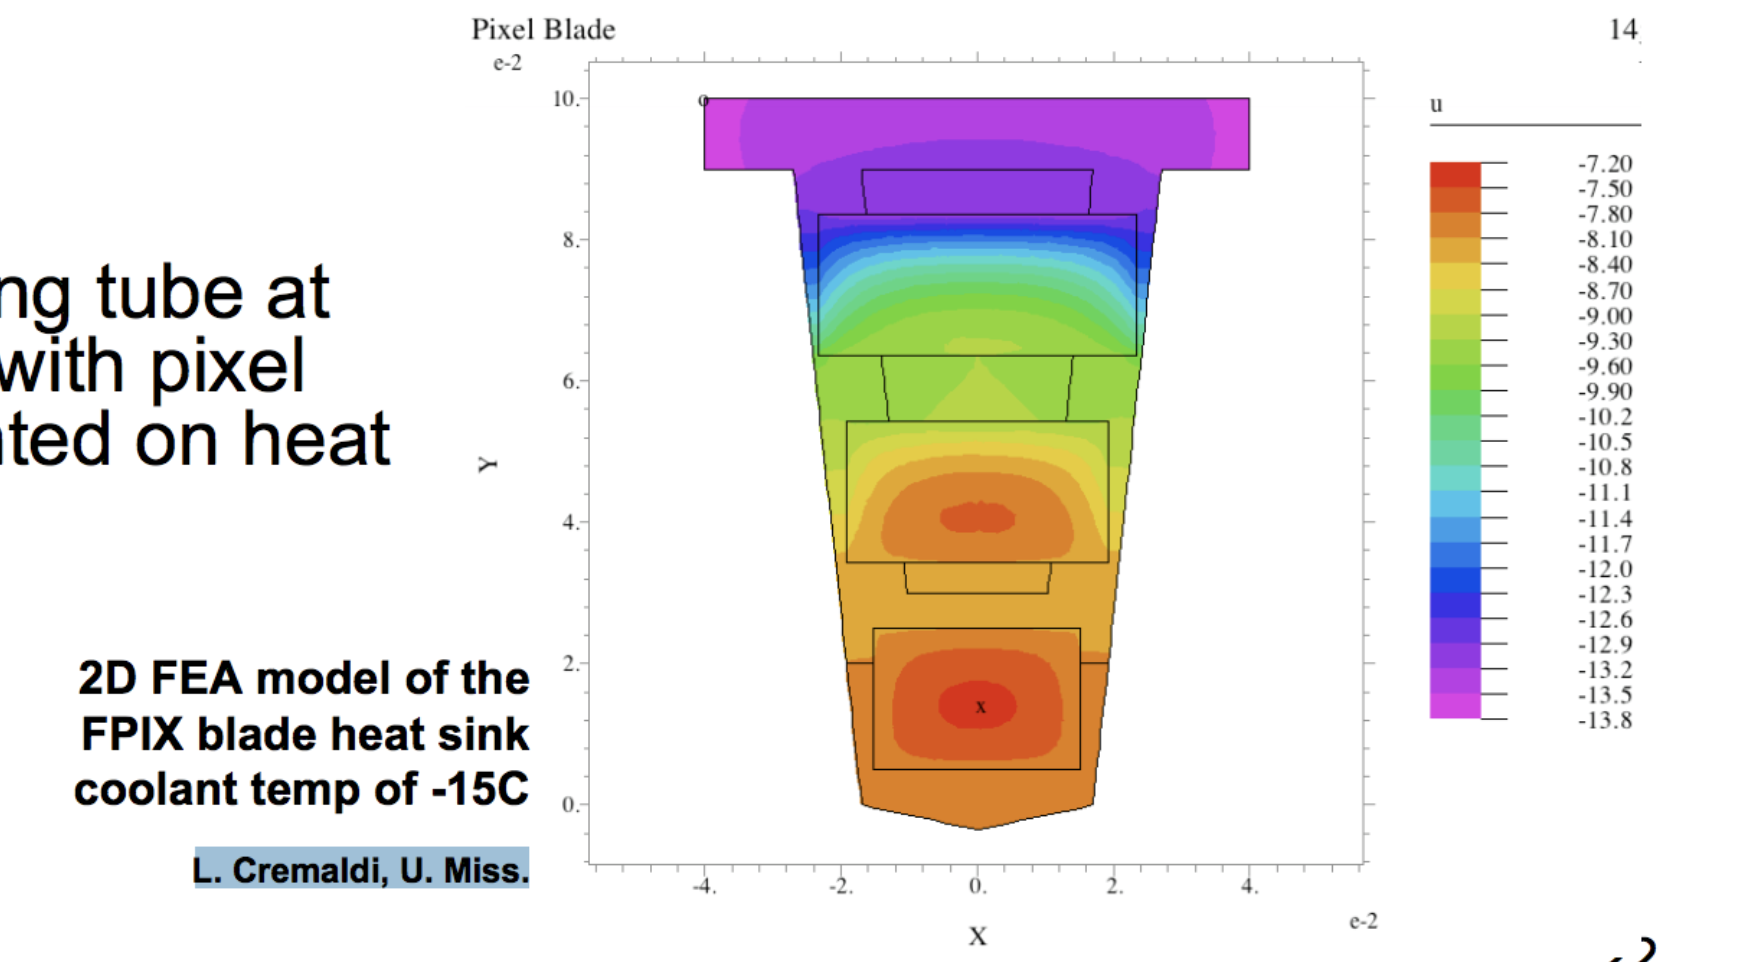


Examples of FEA software (very common in industry) :

https://www.comsol.com/

https://www.comsol.com/products

https://www.comsol.com/blogs/finding-the-best-way-to-make-crepes-with-fluid-dynamics-research/

https://www.ansys.com/

https://www.autodesk.com/solutions/finite-element-analysis




# Overrelaxation & the Gauss Seidel method

As we discussed above, the Jacobi method for solving boundary value problems is somewhat slow for a large grid. We can speed up the method usting two techniques:

#### Overrelaxation

Recall: The Jacobi method makes use of the relaxation method. We take an initial guess, plug that guess into the equation, and then use the result of that equation as our guess for the next iteration. The overrelaxation method can speed this up by "overshooting". Everytime the method produces a new guess, we change the function by a small fraction more such that we converge faster.

#### Guass Seidel

Recall: In order to calculate a new value for the potential at a given point with the Jacobi method we used the 4 neighboring points as well as the previous value of the potential at that point. If we're iterating through the grid, instead of using the 4 "old" values for the neighboring points, we incorporate any new values for the neighboring points that we have already calculated which will make our new value for the current point more accurate.


In [148]:
### Old way (Jacobi method from above)
from numpy import empty,zeros,max
import time
start = time.time()
   
# Constants
M = 10         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-4   #1e-6   # Target accuracy

# Create arrays to hold potential values

# Array containing the potential values for this iteration which are used to calculate the
#   values for the next iteration
phi = zeros([M+1,M+1],float)

# Array containing the newly calculated potential values at each grid point
phiprime = empty([M+1,M+1],float)

# Set Boundary contitions
phi[0,:] = V

print(phi.shape)
print(phiprime.shape)

# Main loop
delta = 1.0
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4

    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi
    
end = time.time()
print("Time Elapsed: ",end - start)

(11, 11)
(11, 11)
Time Elapsed:  0.0464019775390625


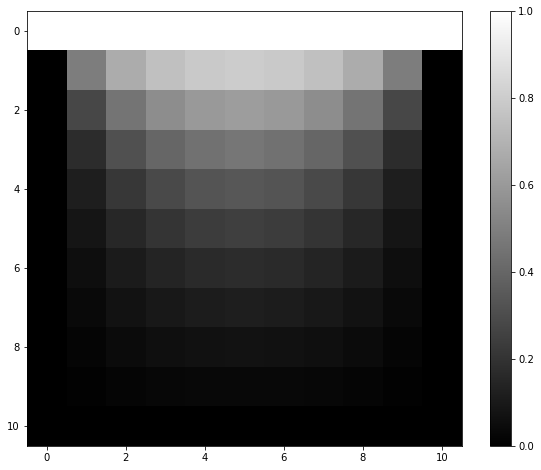

In [149]:
import pylab as plt
plt.rcParams['figure.figsize'] = 10, 8
plt.imshow(phi,origin='upper')
plt.colorbar()
plt.show()

(11, 11)
delta = 0.0379306932985


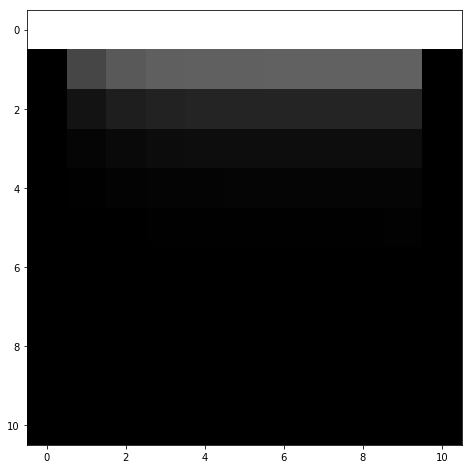

delta = 0.0146084961846


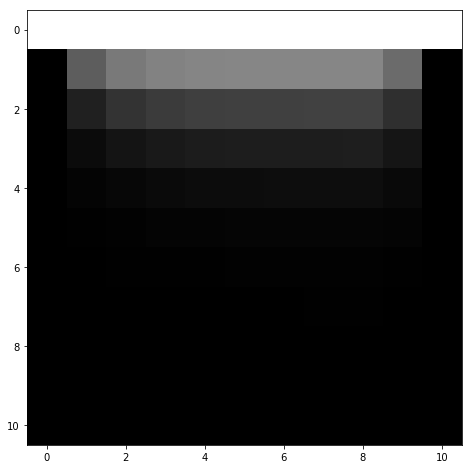

delta = 0.00795544501269


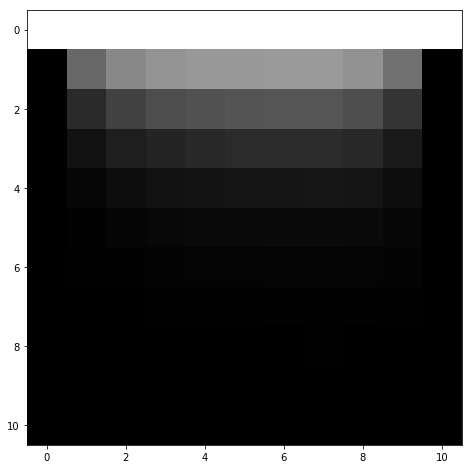

delta = 0.00584339737752


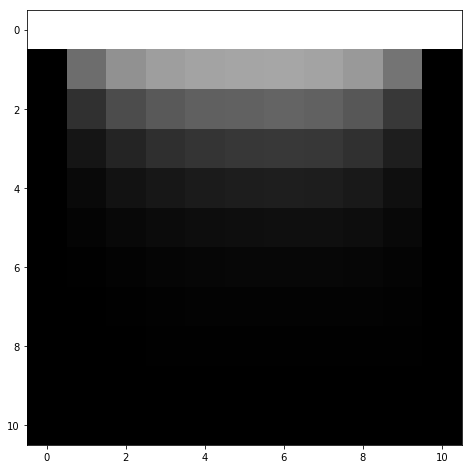

delta = 0.00434844499939


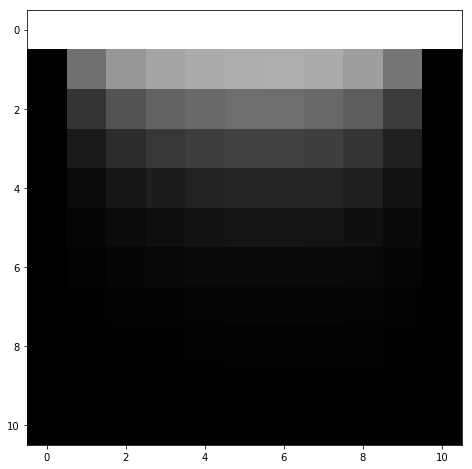

delta = 0.00332263520995


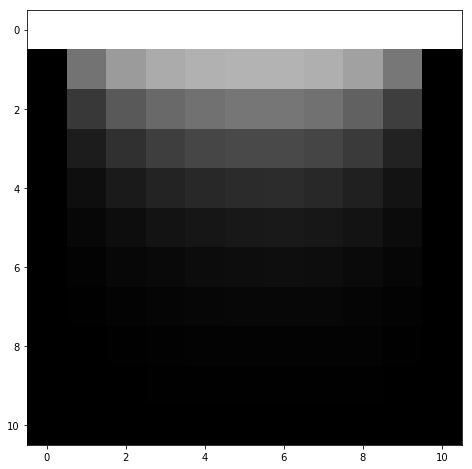

delta = 0.00264663894115


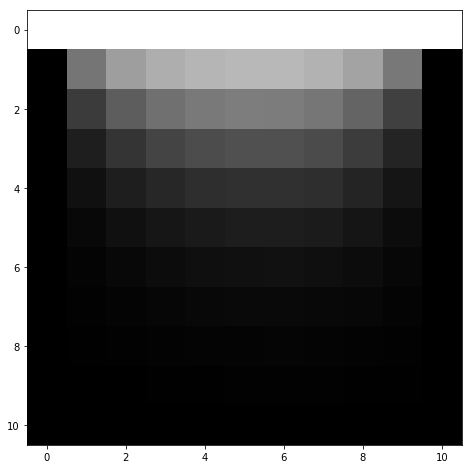

delta = 0.00218078272693


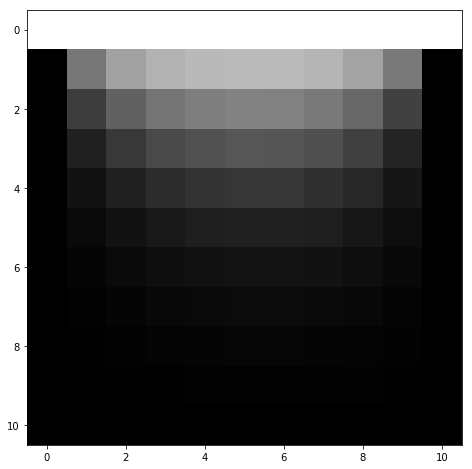

delta = 0.00181106716237


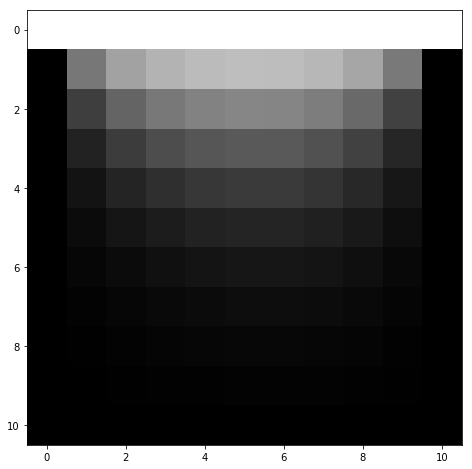

delta = 0.00151602280979


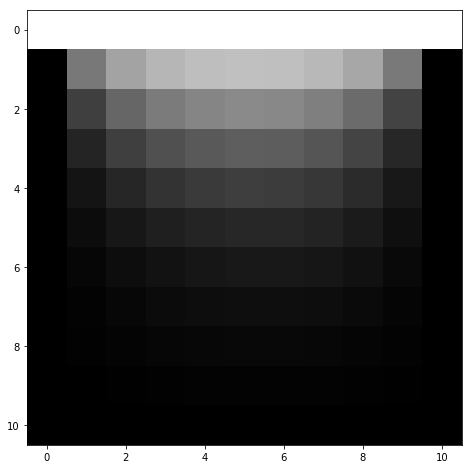

delta = 0.00127882179158


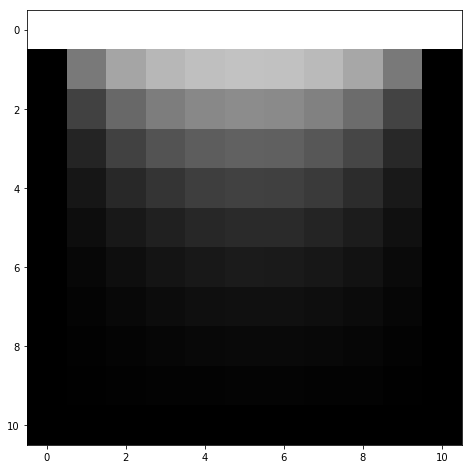

delta = 0.00108931651995


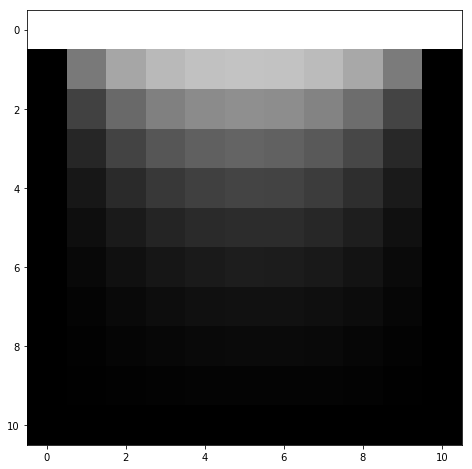

delta = 0.000940941969143


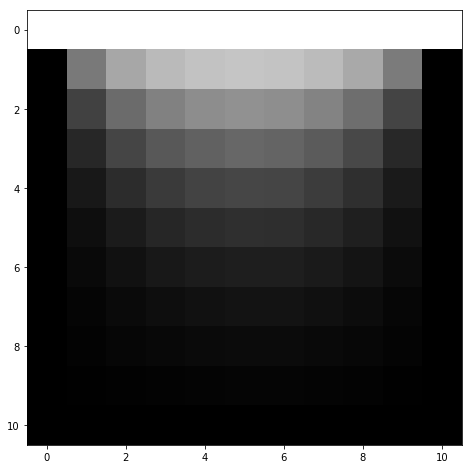

delta = 0.000821504628581


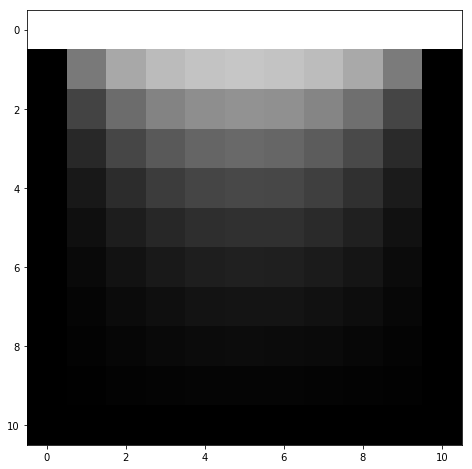

delta = 0.000718435934268


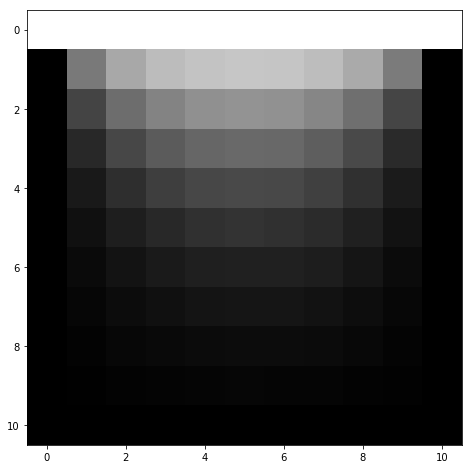

delta = 0.000629255002591


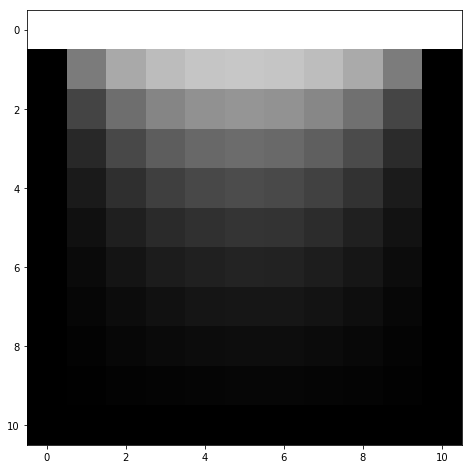

delta = 0.000551881181403


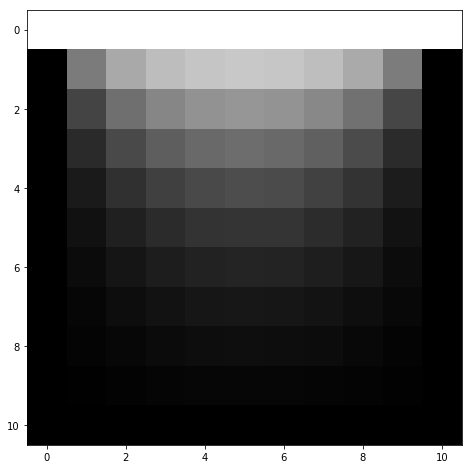

delta = 0.000484579047833


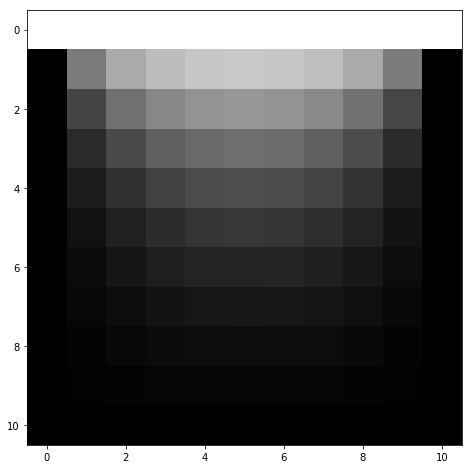

delta = 0.000425901449553


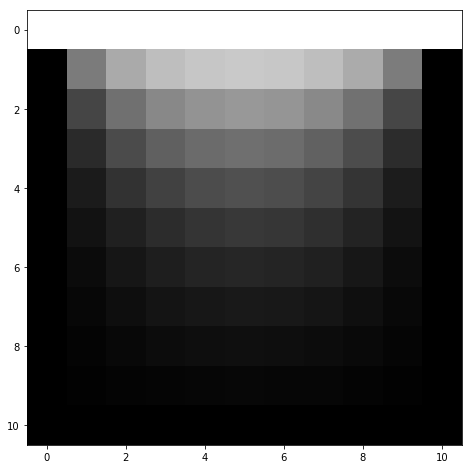

delta = 0.00037463826068


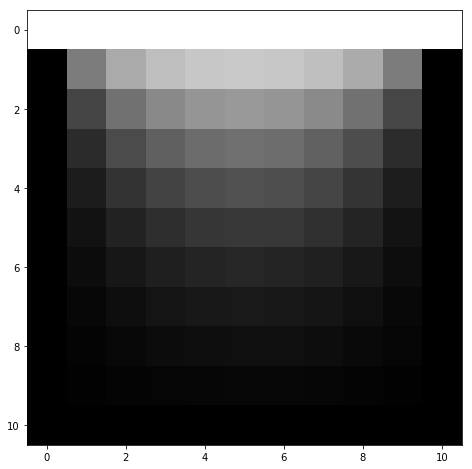

delta = 0.000329773096364


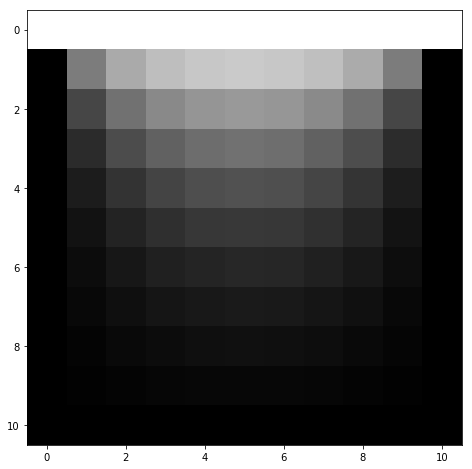

delta = 0.000290447887275


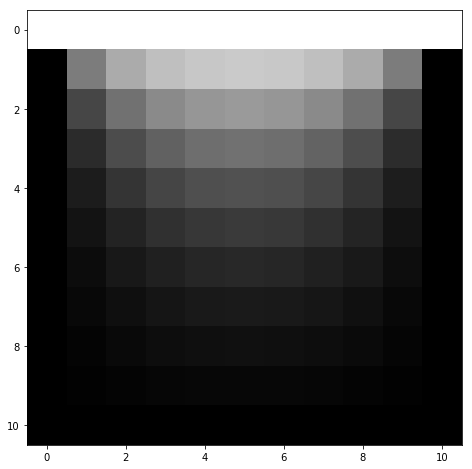

delta = 0.000255934337333


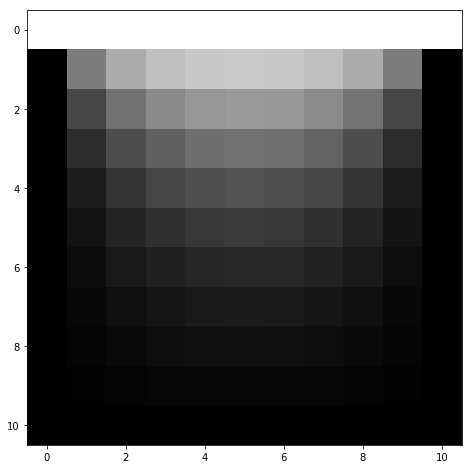

delta = 0.000225611076097


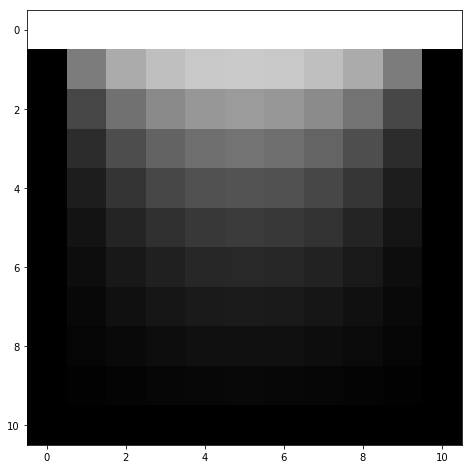

delta = 0.000198945384396


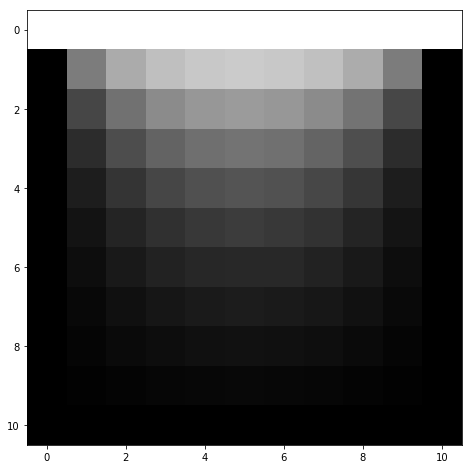

delta = 0.00017547853597


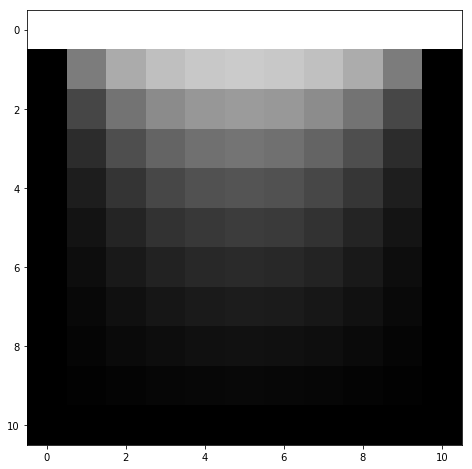

delta = 0.00015481397793


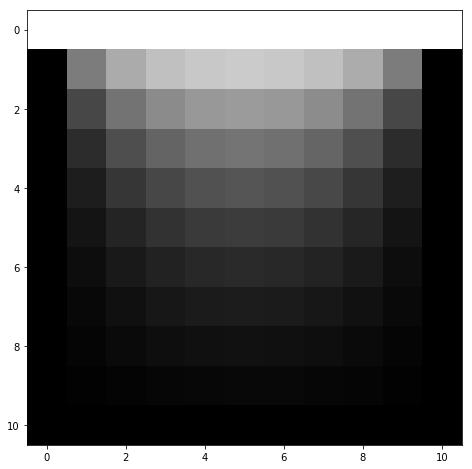

delta = 0.000136607736098


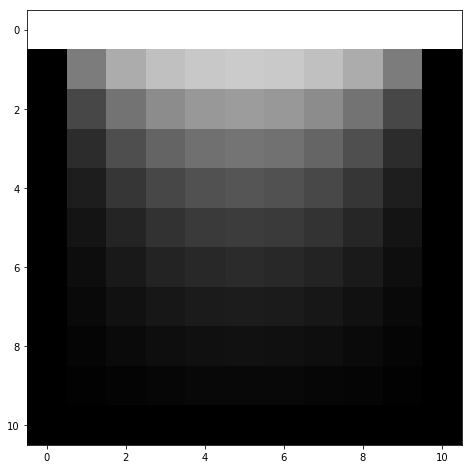

delta = 0.00012056056747


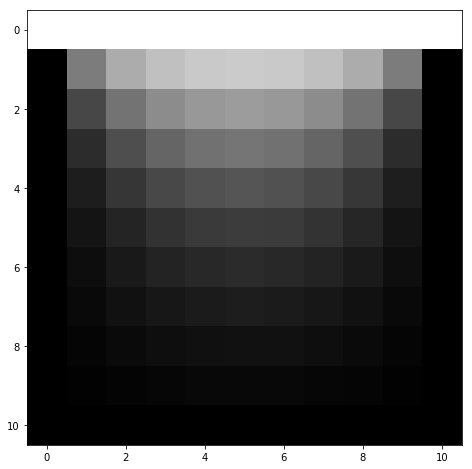

delta = 0.000106411490911


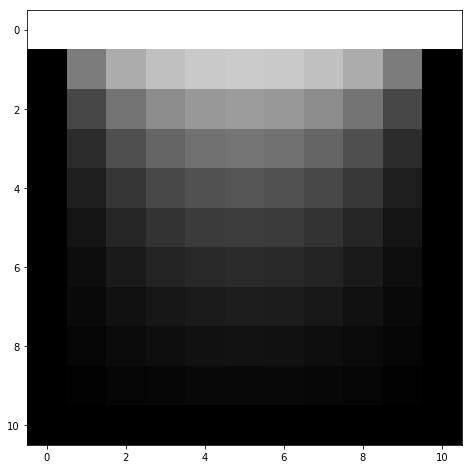

delta = 9.39324119743e-05


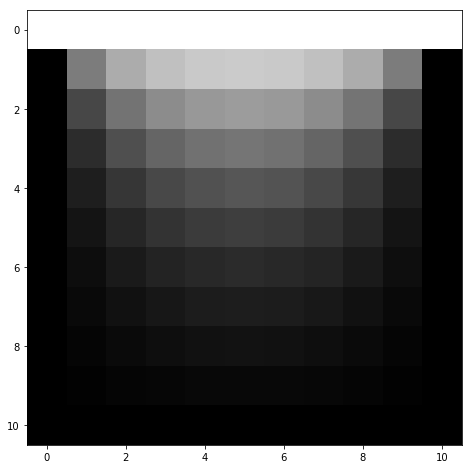

Time Elapsed:  5.266302108764648


In [146]:
### Gauss Seidel with Overrelaxation
from numpy import empty,zeros,max
import time
start = time.time()
   
# Constants
L = 1.0
M = 10         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-4   #1e-6   # Target accuracy
omega = 0.1

# Create arrays to hold potential values

# This time only one array is necessary
phiGS = zeros([M+1,M+1],float)
# Set boundary conditions:
phiGS[0,:] = V

# We will create another array to check convergence.
#  Stop iterating when the difference between two iterations is smaller than some target
dphi = zeros([M+1,M+1],float)

print(phiGS.shape)

plt.rcParams['figure.figsize'] = 10, 8

# Main loop
delta = 1.0
while delta>target:

    # Calculate new values of the potential
    for i in range(0,M+1):
        for j in range(0,M+1):
            
            if i==0 or i==M or j==0 or j==M:
                phiGS[i,j] = phiGS[i,j]
            else:
                # Perform Gauss-Seidel with Overrelaxation
                phiGS[i,j] += (1+omega)*( (phiGS[i+1,j] + phiGS[i-1,j] + phiGS[i,j+1] + phiGS[i,j-1])/4 - phiGS[i,j]) 
                #print(phiGS)
                
                # Check change for target
                dphi[i,j]=(1+omega)*( (phiGS[i+1,j] + phiGS[i-1,j] + phiGS[i,j+1] + phiGS[i,j-1])/4 - phiGS[i,j])
                
    # Calculate maximum difference from old values
    delta = max(abs(dphi))
    print("delta =", delta)
    plt.imshow(phiGS)
    plt.show()
    
end = time.time()
print("Time Elapsed: ",end - start)

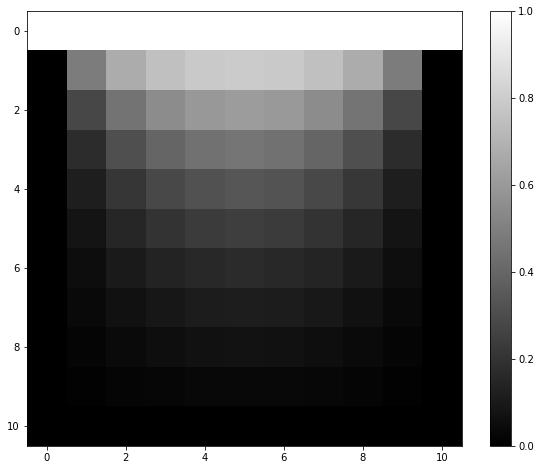

In [147]:
import pylab as plt
plt.rcParams['figure.figsize'] = 10, 8
plt.imshow(phiGS)#,origin='lower')
plt.colorbar()
#gray()
plt.show()

In [163]:
### Gauss Seidel with Overrelaxation
# Can we check which value of omega converges fastest? Yes, by trying multiple values of omega!

from numpy import empty,zeros,max
import time

   
# Constants
L = 1.0
M = 20         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-4   #1e-6   # Target accuracy
#omega = 0.9

# Create arrays to hold potential values
phiGS = zeros([M+1,M+1],float)
phiGS[0,:] = V
dphi = zeros([M+1,M+1],float) 

print(phiGS.shape)
print(dphi.shape)

# Main loop
delta = 1.0

omegas = [0.0000000001, 0.000001, 0.0001, 0.001,0.91,0.9999]
times = []

for k in range(len(omegas)):
    
    start = time.time()
    while delta>target:

        # Calculate new values of the potential
        for i in range(1,M):
            for j in range(1,M):
                # Perform Gauss-Seidel with Overrelaxation
                dphi[i,j] = (1+omegas[k])*( (phiGS[i+1,j] + phiGS[i-1,j] + phiGS[i,j+1] + phiGS[i,j-1])/4 - phiGS[i,j])
                phiGS[i,j] += dphi[i,j]       

        # Calculate maximum difference from old values
        delta = max(abs(dphi))
    
    end = time.time()
    print("Omega = ",omegas[k],"Time Elapsed: ",end - start)
    elapsed = end - start
    times.append(elapsed)

(21, 21)
(21, 21)
Omega =  1e-10 Time Elapsed:  0.2032010555267334
Omega =  1e-06 Time Elapsed:  7.152557373046875e-07
Omega =  0.0001 Time Elapsed:  9.5367431640625e-07
Omega =  0.001 Time Elapsed:  1.1920928955078125e-06
Omega =  0.91 Time Elapsed:  9.5367431640625e-07
Omega =  0.9999 Time Elapsed:  9.5367431640625e-07


In [92]:
import matplotlib.pyplot as plt

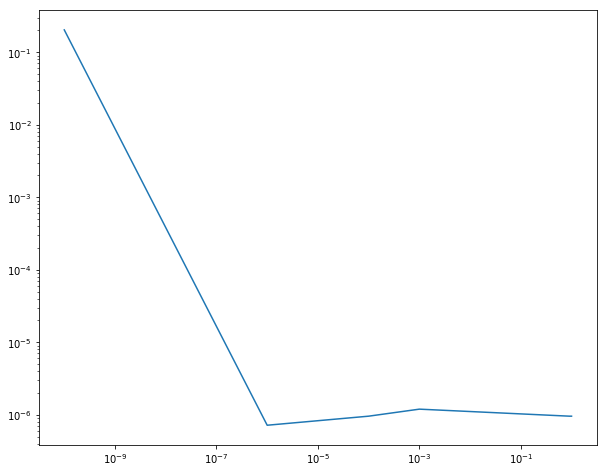

In [164]:
plt.plot(omegas[0:],times[0:])
plt.yscale('log')
plt.xscale('log')
plt.show()

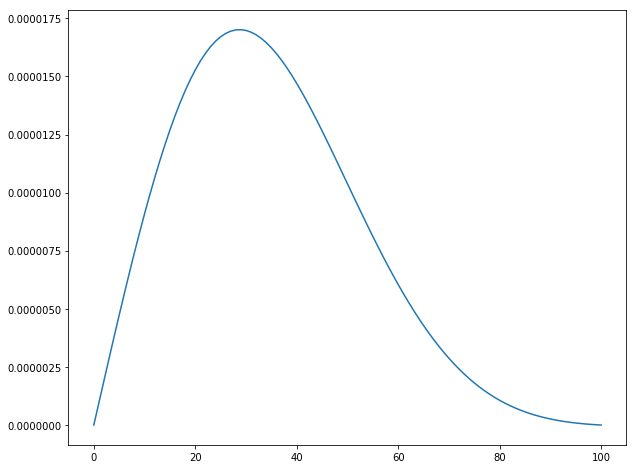

In [78]:
plt.plot(psi2)
plt.show()

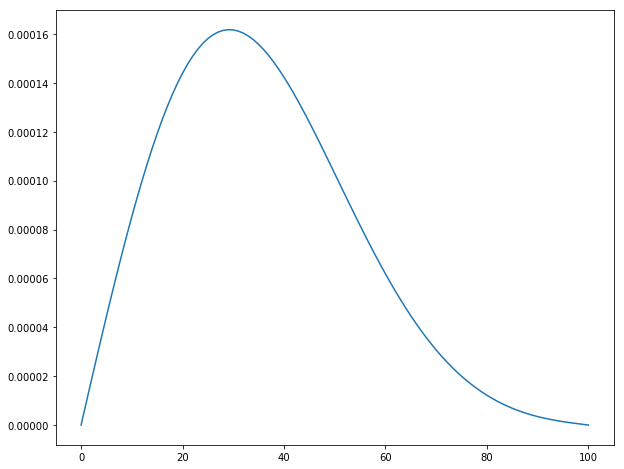

In [77]:
plt.plot(psi3)
plt.show()

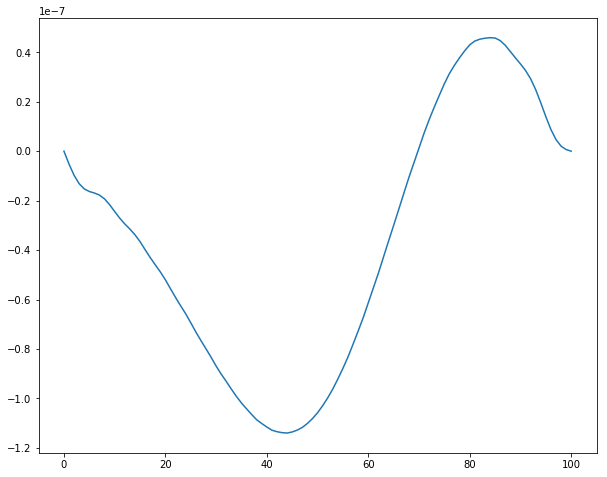

In [76]:
plt.plot(psi4)
plt.show()

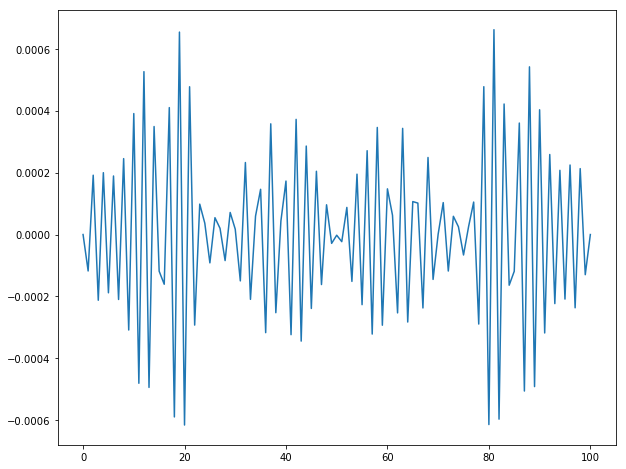

In [75]:
plt.plot(psi5)
plt.show()

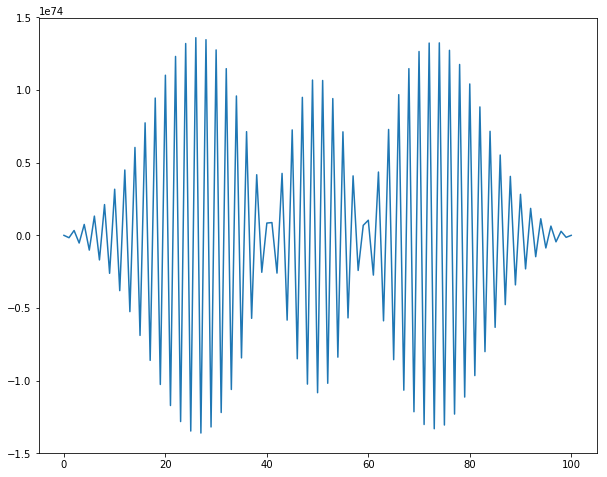

In [74]:
plt.plot(psi6)
plt.show()